In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_shooting = pd.read_excel('Book1.xlsx')
df_jb = pd.read_excel('jb_stats.xlsx')
df_jb_playoffs = pd.read_excel('jb_stats_playoffs.xlsx')
df_pergame = pd.read_excel('league_stats_perGame_2023.xlsx')
df_pergame_playoffs = pd.read_excel('league_playoffs_pergame.xlsx')
df_transition = pd.read_excel('league_transition.xlsx')

In [99]:
pd.set_option('display.max_columns', None)

In [3]:
df_shooting = df_shooting.drop(['Rk'], axis=1)

---
Overview

Remove career totals column

In [5]:
df_jb = df_jb.drop(index=[7])

Career stats progression

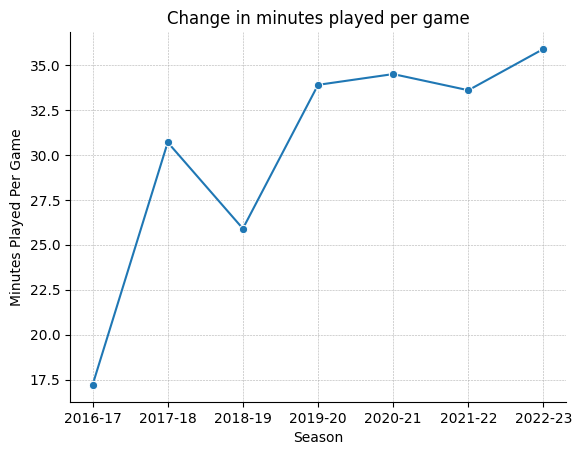

In [347]:
sns.lineplot(x='Season', y='MP', data=df_jb, marker='o')
plt.ylabel('Minutes Played Per Game')
plt.title('Change in minutes played per game')
sns.despine()
plt.grid(linewidth = '0.4', linestyle = '--')
plt.show()

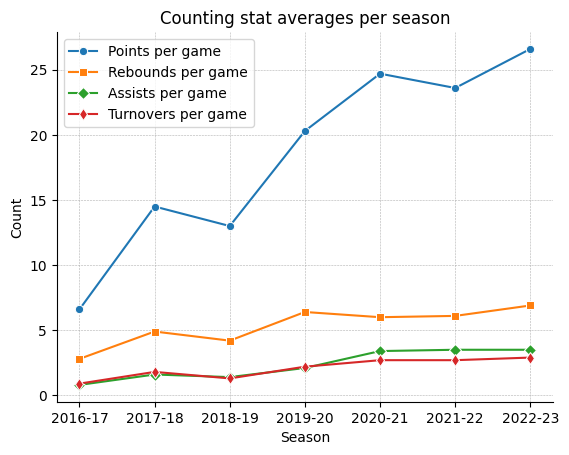

In [348]:
sns.lineplot(x='Season', y='PTS', data=df_jb, label='Points per game', marker='o')
sns.lineplot(x='Season', y='TRB', data=df_jb, label='Rebounds per game', marker='s')
sns.lineplot(x='Season', y='AST', data=df_jb, label='Assists per game', marker='D')
sns.lineplot(x='Season', y='TOV', data=df_jb, label='Turnovers per game', marker='d')
plt.ylabel('Count')
plt.title('Counting stat averages per season')
sns.despine()
plt.grid(linewidth = '0.4', linestyle = '--')
plt.show()

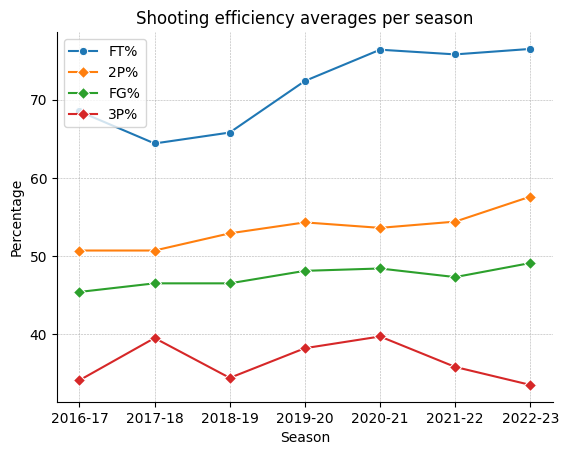

In [344]:
sns.lineplot(x='Season', y=df_jb['FT%']*100, data=df_jb, label='FT%', marker='o')
sns.lineplot(x='Season', y=df_jb['2P%']*100, data=df_jb, label='2P%', marker='D')
sns.lineplot(x='Season', y=df_jb['FG%']*100, data=df_jb, label='FG%', marker='D')
sns.lineplot(x='Season', y=df_jb['3P%']*100, data=df_jb, label='3P%', marker='D')

plt.ylabel('Percentage')
plt.title('Shooting efficiency averages per season')
sns.despine()
plt.legend(loc='upper left')
plt.grid(linewidth = '0.4', linestyle = '--')
plt.show()

Filter for players who have played at least 45 games and averaged at least 30 minutes a night

In [4]:
df_adjusted = df_pergame[(df_pergame['MP'] >= 30) & (df_pergame['G'] >= 45)]
df_adjusted.shape

(101, 30)

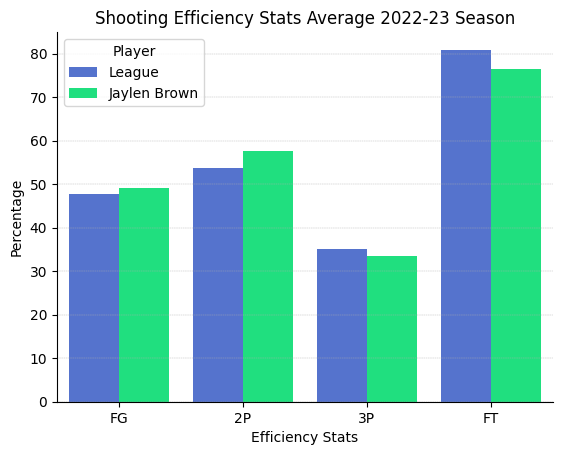

In [307]:
league_fg = df_adjusted['FG%'].mean() * 100
league_2p = df_adjusted['2P%'].mean() * 100
league_3p = df_adjusted['3P%'].mean() * 100
league_ft = df_adjusted['FT%'].mean() * 100

jb_fg = df_pergame.loc[df_pergame['Player'] == 'Jaylen Brown', 'FG%'].item() * 100
jb_2p = df_pergame.loc[df_pergame['Player'] == 'Jaylen Brown', '2P%'].item() * 100
jb_3p = df_pergame.loc[df_pergame['Player'] == 'Jaylen Brown', '3P%'].item() * 100
jb_ft = df_pergame.loc[df_pergame['Player'] == 'Jaylen Brown', 'FT%'].item() * 100

data = {'Percentage': [league_fg, league_2p, league_3p, league_ft, jb_fg, jb_2p, jb_3p, jb_ft], 
        'Player': ['League', 'League', 'League', 'League', 'Jaylen Brown', 'Jaylen Brown', 'Jaylen Brown', 'Jaylen Brown'], 
        'Metric': ['FG', '2P', '3P', 'FT', 'FG', '2P', '3P', 'FT']}


final_df = pd.DataFrame(data)

colours = ['royalblue', 'springgreen', 'royalblue', 'springgreen', 'royalblue', 'springgreen', 'royalblue', 'springgreen', 'royalblue', 'springgreen', ]

sns.barplot(x='Metric', y = 'Percentage', hue='Player', data = final_df, palette=colours)
sns.despine()
plt.xlabel('Efficiency Stats')
plt.title('Shooting Efficiency Stats Average 2022-23 Season')
plt.grid(axis='y', linewidth = 0.3, linestyle='--')
plt.show()

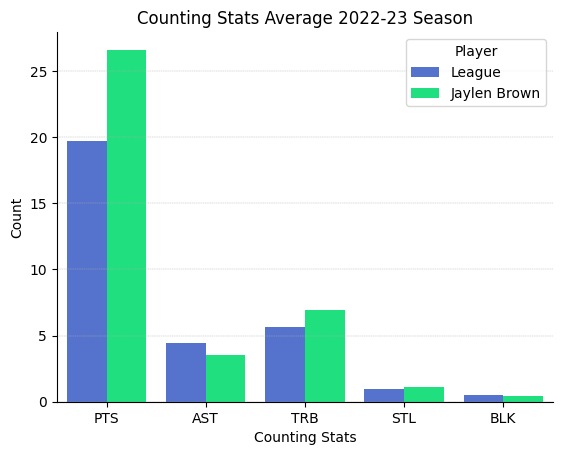

In [447]:
league_pts = df_adjusted['PTS'].mean()
league_ast = df_adjusted['AST'].mean()
league_trb = df_adjusted['TRB'].mean()
league_stl = df_adjusted['STL'].mean()
league_blk = df_adjusted['BLK'].mean()

jb_pts = df_pergame.loc[df_pergame['Player'] == 'Jaylen Brown', 'PTS'].item()
jb_ast = df_pergame.loc[df_pergame['Player'] == 'Jaylen Brown', 'AST'].item()
jb_trb = df_pergame.loc[df_pergame['Player'] == 'Jaylen Brown', 'TRB'].item()
jb_stl = df_pergame.loc[df_pergame['Player'] == 'Jaylen Brown', 'STL'].item()
jb_blk = df_pergame.loc[df_pergame['Player'] == 'Jaylen Brown', 'BLK'].item()

data = {'Count': [league_pts, league_ast, league_trb, league_stl, league_blk, jb_pts, jb_ast, jb_trb, jb_stl, jb_blk], 
        'Player': ['League', 'League', 'League', 'League', 'League', 'Jaylen Brown', 'Jaylen Brown', 'Jaylen Brown', 'Jaylen Brown', 'Jaylen Brown'], 
        'Metric': ['PTS', 'AST', 'TRB', 'STL', 'BLK', 'PTS', 'AST', 'TRB', 'STL', 'BLK']}


final_df = pd.DataFrame(data)

colours = ['royalblue', 'springgreen', 'royalblue', 'springgreen', 'royalblue', 'springgreen', 'royalblue', 'springgreen', 'royalblue', 'springgreen', ]

ax = sns.barplot(x='Metric', y = 'Count', hue='Player', data = final_df, palette=colours)
plt.grid(axis='y', linewidth = 0.3, linestyle='--')
plt.title('Counting Stats Average 2022-23 Season')
plt.xlabel('Counting Stats')
sns.despine()
plt.show()

---
Strengths

Filter for players who:
- took at least 10% of their shots from 10-16ft
- played at least 1000 minutes
- played in at least 50/83 games

In [198]:
df_midrange = df_shooting[(df_shooting['% of 10-16'] >= 0.1) & (df_shooting['MP'] > 1000)
            & (df_shooting['G'] > 50)]

Drop duplicates (players who changed teams mid-season), keeping the first row which is the total of the stats from the two or more teams combined

In [211]:
df_midrange = df_midrange.drop_duplicates(subset='Player', keep='first')
df_midrange[df_midrange.duplicated(['Player'])]

,Rk,Player,Pos,G,MP,FG%,Dist.,% of 2P,% of 0-3,% of 3-10,% of 10-16,% of 16-3P,% of 3P,FG% 2P,FG% 0-3,FG% 3-10,FG% 10-16,FG% 16-3P,FG% 3P,% of 2P.1,% of 3P.1,Dunk %FGA,Dunk #,Corner %3PA,Corner 3P%


Get the top 5 by mid-range shooting efficiency

In [206]:
df_top5midrange = df_midrange.nlargest(n=5, columns=['FG% 10-16'])

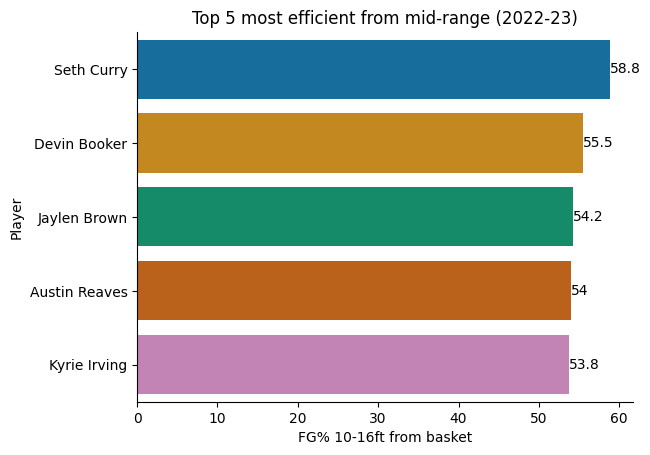

In [435]:
ax = sns.barplot(y = df_top5midrange['Player'], x = df_top5midrange['FG% 10-16']*100, orient = 'h', palette='colorblind')
plt.title('Top 5 most efficient from mid-range (2022-23)')
plt.ylabel('Player')
plt.xlabel('FG% 10-16ft from basket')
sns.despine()
ax.bar_label(ax.containers[0])
plt.show()

Get the top 50 by mid-range shooting efficiency

In [201]:
df_midrange = df_midrange.nlargest(n=50, columns=['FG% 10-16'])

Merge points per game data to matching players in the top 50

In [208]:
df_ppg = df_pergame[['Player', 'PTS']].copy()
df_merged = pd.merge(df_ppg, df_midrange)

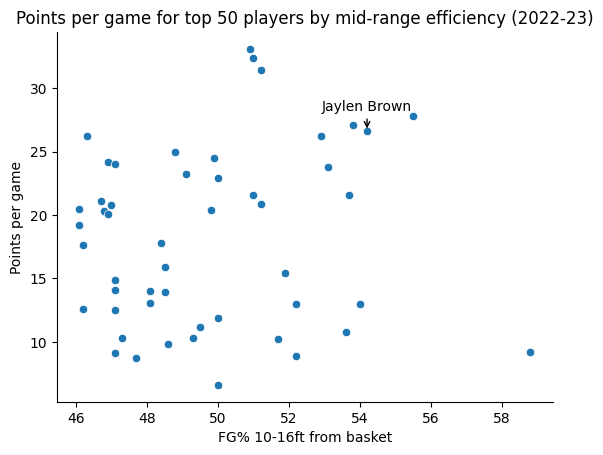

In [304]:
sns.scatterplot(x = df_merged['FG% 10-16']*100, y = 'PTS', data = df_merged)

target_row = df_merged[df_merged['Player'] == 'Jaylen Brown']
x_value = target_row['FG% 10-16'].values[0]*100
y_value = target_row['PTS'].values[0]
plt.annotate('Jaylen Brown', (x_value, y_value), textcoords="offset points", xytext=(0,15), 
             ha='center', arrowprops=dict(arrowstyle="->"))
plt.title('Points per game for top 50 players by mid-range efficiency (2022-23)')
plt.xlabel('FG% 10-16ft from basket')
plt.ylabel('Points per game')
sns.despine()
plt.show()



Transition

In [5]:
df_top20transition = df_transition.nlargest(n=10, columns=['POSS']).sort_values(by=['PPP'], ascending=False)

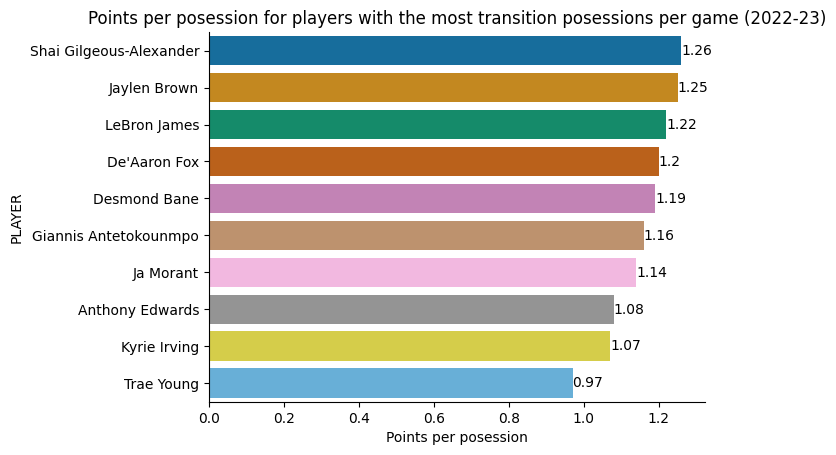

In [6]:
ax = sns.barplot(x='PPP', y='PLAYER', data=df_top20transition, orient='h', palette='colorblind')
plt.title('Points per posession for players with the most transition posessions per game (2022-23)')
plt.xlabel('Points per posession')
sns.despine()
ax.bar_label(ax.containers[0])
plt.show()

---
Weaknesses

Filter league post season stats for players who averaged at least 30 minutes per game

In [8]:
df_adjusted_post = df_pergame_playoffs[df_pergame_playoffs['MP'] >= 30]

---
Turnovers: Regular Season Vs. Post Season (JB, League)

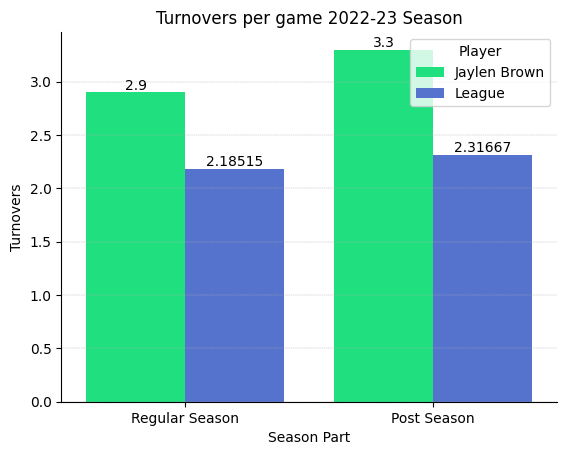

In [437]:
league_tov_post = df_adjusted_post['TOV'].mean()
league_tov_reg = df_adjusted['TOV'].mean()
jb_tov_reg = df_jb.loc[df_jb['Season'] == '2022-23', 'TOV'].item()
jb_tov_post = df_jb_playoffs.loc[df_jb_playoffs['Season'] == '2022-23', 'TOV'].item()

data = {'Turnovers': [jb_tov_reg, jb_tov_post, league_tov_reg, league_tov_post], 
        'Player': ['Jaylen Brown', 'Jaylen Brown', 'League', 'League'], 
        'Season Part': ['Regular Season', 'Post Season', 'Regular Season', 'Post Season']}

colours = ['springgreen', 'royalblue', 'springgreen', 'royalblue']

final_df = pd.DataFrame(data)

ax = sns.barplot(x='Season Part', y='Turnovers', hue='Player', data=final_df, palette=colours)
sns.despine()
plt.grid(axis='y', linewidth = 0.3, linestyle='--')
plt.title('Turnovers per game 2022-23 Season')
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

---
Free throw percentage: Regular Season Vs. Post Season (Brown, League)

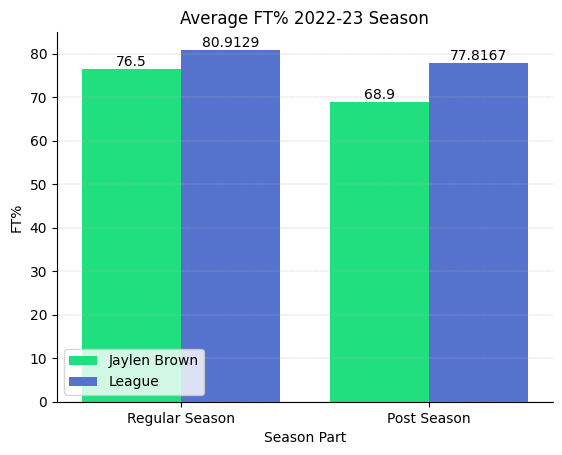

In [9]:
league_ft_post = df_adjusted_post['FT%'].mean()
league_ft_reg = df_adjusted['FT%'].mean()
jb_ft_reg = df_jb.loc[df_jb['Season'] == '2022-23', 'FT%'].item()
jb_ft_post = df_jb_playoffs.loc[df_jb_playoffs['Season'] == '2022-23', 'FT%'].item()

data = {'FT%': [jb_ft_reg, jb_ft_post, league_ft_reg, league_ft_post], 
        'Player': ['Jaylen Brown', 'Jaylen Brown', 'League', 'League'], 
        'Season Part': ['Regular Season', 'Post Season', 'Regular Season', 'Post Season']}

colours = ['springgreen', 'royalblue', 'springgreen', 'royalblue']

final_df = pd.DataFrame(data)

ax = sns.barplot(x='Season Part', y=final_df['FT%']*100, hue='Player', data=final_df, palette=colours)
plt.grid(axis='y', linewidth = 0.3, linestyle='--')
plt.title('Average FT% 2022-23 Season')
plt.legend(loc='lower left')
sns.despine()
for i in ax.containers:
    ax.bar_label(i,)
plt.show()


Taking into account games played
- players must have played at least 18 games

In [363]:
df_adjusted_post_gp = df_adjusted_post[df_adjusted_post['G'] >= 18]

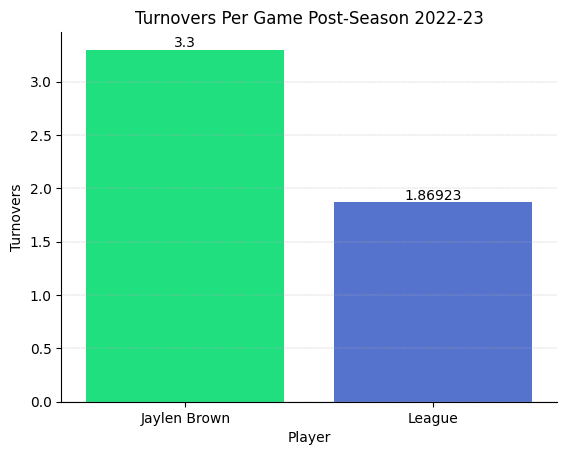

In [443]:
jb_tov_post = df_jb_playoffs.loc[df_jb_playoffs['Season'] == '2022-23', 'TOV'].item()
league_tov_post = df_adjusted_post_gp['TOV'].mean()

data =[['Jaylen Brown', jb_tov_post], ['League', league_tov_post]]

final_df = pd.DataFrame(data, columns=['Player', 'Turnovers'])

colours = ['springgreen', 'royalblue']
  
ax = sns.barplot(x='Player', y='Turnovers', data=final_df, palette=colours)
sns.despine()
plt.grid(axis='y', linewidth = 0.3, linestyle='--')
plt.title('Turnovers Per Game Post-Season 2022-23')
ax.bar_label(ax.containers[0])
plt.show()


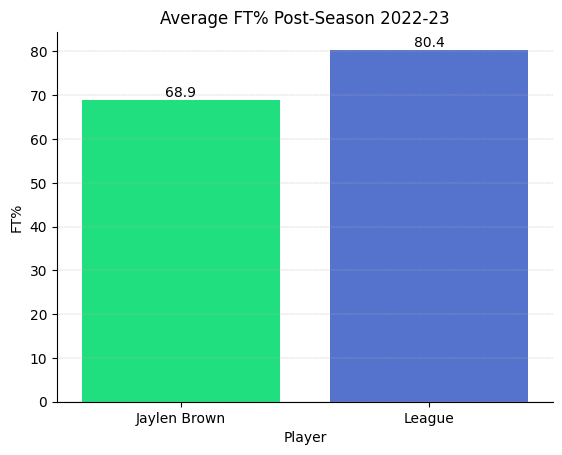

In [440]:
jb_ft_post = df_jb_playoffs.loc[df_jb_playoffs['Season'] == '2022-23', 'FT%'].item()
league_ft_post = df_adjusted_post_gp['FT%'].mean()

data =[['Jaylen Brown', jb_ft_post], ['League', league_ft_post]]

final_df = pd.DataFrame(data, columns=['Player', 'FT%'])

colours = ['springgreen', 'royalblue']
  
ax = sns.barplot(x='Player', y=final_df['FT%']*100, data=final_df, palette=colours)
sns.despine()
plt.grid(axis='y', linewidth = 0.3, linestyle='--')
plt.title('Average FT% Post-Season 2022-23')
ax.bar_label(ax.containers[0])
plt.show()